In [551]:
import datetime
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, auc,  classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [383]:
train_data = pd.read_csv("/Users/poojitha/Downloads/archive (6)/fraudTrain.csv")

In [387]:
train_data.shape

(1296675, 23)

In [389]:
train_data.info

<bound method DataFrame.info of          Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category    amt  \
0                 fraud_Rippin, Kub and Mann       misc_net   4.97   
1            fraud_Heller, Gutmann 

In [391]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,"1,296,675.00","1,296,675.00","1,296,675.00","1,296,675.00","1,296,675.00","1,296,675.00","1,296,675.00","1,296,675.00","1,296,675.00","1,296,675.00","1,296,675.00"
mean,"648,337.00","417,192,042,079,726,656.00",70.35,"48,800.67",38.54,-90.23,"88,824.44","1,349,243,636.73",38.54,-90.23,0.01
std,"374,317.97","1,308,806,447,000,789,248.00",160.32,"26,893.22",5.08,13.76,"301,956.36","12,841,278.42",5.11,13.77,0.08
min,0.00,"60,416,207,185.00",1.00,"1,257.00",20.03,-165.67,23.00,"1,325,376,018.00",19.03,-166.67,0.00
25%,"324,168.50","180,042,946,491,150.00",9.65,"26,237.00",34.62,-96.80,743.00,"1,338,750,742.50",34.73,-96.90,0.00
50%,"648,337.00","3,521,417,320,836,166.00",47.52,"48,174.00",39.35,-87.48,"2,456.00","1,349,249,747.00",39.37,-87.44,0.00
75%,"972,505.50","4,642,255,475,285,942.00",83.14,"72,042.00",41.94,-80.16,"20,328.00","1,359,385,375.50",41.96,-80.24,0.00
max,"1,296,674.00","4,992,346,398,065,154,048.00","28,948.90","99,783.00",66.69,-67.95,"2,906,700.00","1,371,816,817.00",67.51,-66.95,1.00


In [393]:
train_data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [395]:
train_data['trans_date_trans_time']=pd.to_datetime(train_data['trans_date_trans_time'])
train_data["dob"] = pd.to_datetime(train_data["dob"])

In [397]:
train_data.drop(columns=['Unnamed: 0','cc_num','first','last','street','city','zip','trans_num','merchant','job'],inplace=True)
                         

In [260]:
train_data.dropna(ignore_index=True)

,trans_date_trans_time,category,amt,gender,state,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,misc_net,4.97,F,NC,36.08,-81.18,3495,1988-03-09,1325376018,36.01,-82.05,0
1,2019-01-01 00:00:44,grocery_pos,107.23,F,WA,48.89,-118.21,149,1978-06-21,1325376044,49.16,-118.19,0
2,2019-01-01 00:00:51,entertainment,220.11,M,ID,42.18,-112.26,4154,1962-01-19,1325376051,43.15,-112.15,0
3,2019-01-01 00:01:16,gas_transport,45.00,M,MT,46.23,-112.11,1939,1967-01-12,1325376076,47.03,-112.56,0
4,2019-01-01 00:03:06,misc_pos,41.96,M,VA,38.42,-79.46,99,1986-03-28,1325376186,38.67,-78.63,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,entertainment,15.56,M,UT,37.72,-112.48,258,1961-11-24,1371816728,36.84,-111.69,0
1296671,2020-06-21 12:12:19,food_dining,51.70,M,MD,39.27,-77.51,100,1979-12-11,1371816739,38.91,-78.25,0
1296672,2020-06-21 12:12:32,food_dining,105.93,M,NM,32.94,-105.82,899,1967-08-30,1371816752,33.62,-105.13,0
1296673,2020-06-21 12:13:36,food_dining,74.90,M,SD,43.35,-102.54,1126,1980-08-18,1371816816,42.79,-103.24,0


In [399]:
#To find the age of customers at the time of transaction
train_data['age'] = (
    (train_data['trans_date_trans_time'] - train_data['dob'])
    .dt.days // 365
)

In [401]:
train_data['age'].describe()

count   1,296,675.00
mean           45.53
std            17.41
min            13.00
25%            32.00
50%            44.00
75%            57.00
max            95.00
Name: age, dtype: float64

In [405]:
#To obtain important time features from transaction_Datetime

train_data['hour'] = train_data['trans_date_trans_time'].dt.hour
train_data['day_of_week'] = train_data['trans_date_trans_time'].dt.dayofweek
train_data['is_weekend'] = train_data['day_of_week'].isin([5, 6]).astype(int) 


In [407]:
#To determine distance between customer and transaction location

def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points
    on the Earth (specified in decimal degrees).
    Returns distance in kilometers.
    """
    # Earth radius in kilometers
    R = 6371  

    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(
        np.radians, [lat1, lon1, lat2, lon2]
    )

    # Differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula
    a = (
        np.sin(dlat / 2)**2
        + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    )
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

train_data['distance_km'] = haversine_distance(
    train_data['lat'],
    train_data['long'],
    train_data['merch_lat'],
    train_data['merch_long']
)

In [409]:
train_data['distance_km'].describe()

count   1,296,675.00
mean           76.11
std            29.12
min             0.02
25%            55.33
50%            78.23
75%            98.50
max           152.12
Name: distance_km, dtype: float64

<Axes: title={'center': 'Top Categories by Fraud Rate'}, xlabel='category'>

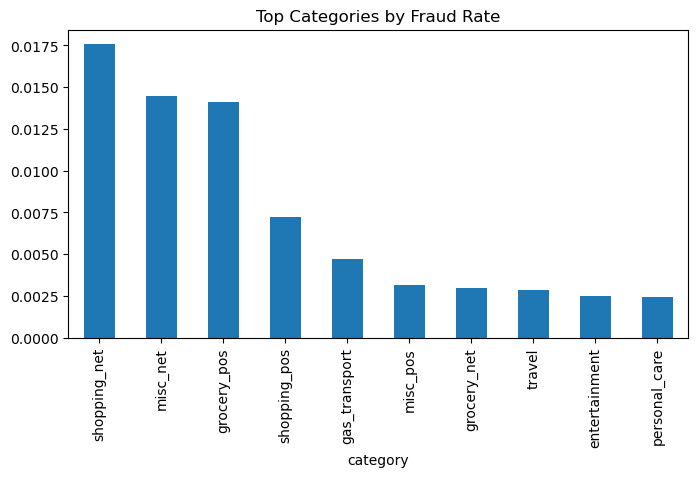

In [417]:
#Types of purchases that are mostly Fraud

fraud_by_category = (
     train_data
    .groupby('category')['is_fraud']
    .mean()
    .sort_values(ascending=False)
)

fraud_by_category.head(10).plot(
    kind='bar',
    figsize=(8,4),
    title='Top Categories by Fraud Rate'
)

In [439]:
# Analyzing Fraud rate vs volume together and the total amount interaction analysis

pd.set_option('display.float_format', '{:.5f}'.format)
category_stats = (
    train_data
    .groupby('category')
    .agg(
        fraud_rate=('is_fraud', 'mean'), # Risk (Probability of fraud)
        fraud_count=('is_fraud', 'sum'), # Impact (How many fraud cases)
        total_txn=('is_fraud', 'count') # Exposure (Volume)
    )
    .assign(fraud_rate=lambda df: df['fraud_rate'].round(5))
    .sort_values('fraud_rate', ascending=False)
)

category_stats.head(10)


,fraud_rate,fraud_count,total_txn
category,,,
shopping_net,0.01756,1713,97543
misc_net,0.01446,915,63287
grocery_pos,0.01410,1743,123638
shopping_pos,0.00723,843,116672
gas_transport,0.00469,618,131659
misc_pos,0.00314,250,79655
grocery_net,0.00295,134,45452
travel,0.00286,116,40507
entertainment,0.00248,233,94014


From the above Category Vs Fraud rate Analysis, we can interpret that:

shopping_net → highest risk
grocery_pos → highest impact
misc_net → high risk, low volume

Online shopping (*.net) categories exhibit the highest fraud rates, reflecting the increased risk associated with card-not-present transactions.

While online shopping categories such as shopping_net exhibit the highest fraud rates, high-volume categories like grocery_pos contribute the largest number of fraudulent transactions overall. This highlights an important distinction between fraud risk and fraud impact. Some categories are inherently riskier, while others generate significant fraud volume due to transaction frequency. These findings reinforce the need for transaction-level predictive modeling rather than category-based rules.

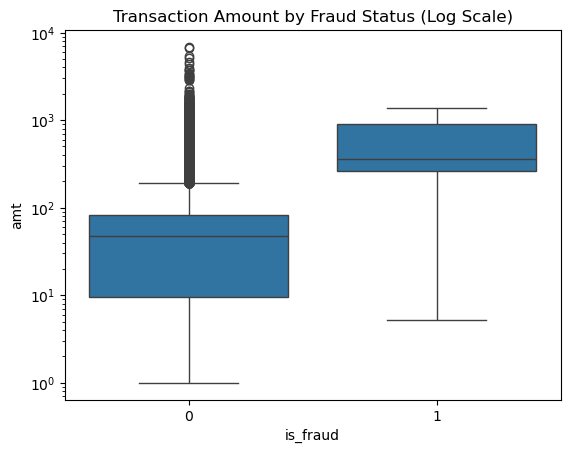

In [441]:
#Fraud Vs Transaction Amount
sns.boxplot(
    data=train_data.sample(50000, random_state=42),
    x='is_fraud',
    y='amt'
)
plt.yscale('log')
plt.title('Transaction Amount by Fraud Status (Log Scale)')
plt.show()


In [457]:
amt_summary = (
    train_data
    .groupby('is_fraud')['amt']
    .describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99])
)

amt_summary

,count,mean,std,min,50%,75%,90%,95%,99%,max
is_fraud,,,,,,,,,,
0,1289169.00000,67.66711,154.00797,1.00000,47.28000,82.54000,134.21000,189.90000,486.30320,28948.90000
1,7506.00000,531.32009,390.56007,1.06000,396.50500,900.87500,1024.59500,1083.98500,1179.69000,1376.04000


From the above Fraud Vs Transaction amount, we can interpret that:

1. Fraud transactions are an order of magnitude larger. Legit transaction median is $47 and Fraud transaction Median is $397 which is 8x larger. Comparing the 75th percentile, fraud is 11x larger than legit.
2. Legit transactions have rare and very large outliers (upto $28k) whereas Fraud transactions cap out lower ($1.4k). So outlier removal is not the right choice.
3. Majority of Fraudalent transactions occur in the $400–$1,100 range and they are not the largest transactions. 


In [465]:
fraud_by_state = (
    train_data
    .groupby('state')
    .agg(
        fraud_rate=('is_fraud', 'mean'),
        fraud_count=('is_fraud', 'sum'),
        total_txn=('is_fraud', 'count')
    )
    .sort_values('fraud_rate', ascending=False)
)

fraud_by_state


,fraud_rate,fraud_count,total_txn
state,,,
DE,1.00000,9,9
RI,0.02727,15,550
AK,0.01698,36,2120
NV,0.00838,47,5607
CO,0.00814,113,13880
OR,0.00801,149,18597
TN,0.00798,140,17554
NE,0.00745,180,24168
ME,0.00721,119,16505


From the above Fraud Vs State, we can interpret that:

1. Delaware(DE) has 100% fraud rate, but it has only 9 transactins in total and all 9 happened to be fraud. Not statistically meanigful. It should not be interpreted as a true geographic risk signal.
2. Most states cluster tightly between 0.45% and 0.7% fraud rate. So Fraud rate is remarkably consistent across most states. No dramatic geographic concentration of fraud risk.
3. Looking at Fraud counts instead of fraud rates is more meaningful. Some high impact states include NY(555), TX(479), PA(458), CA(326), OH(321), Fl(281). 

   State-level fraud rates show limited variation across the majority of states, with most clustering near the overall dataset average. High-volume states such as California, Texas, New York, and Florida account for the largest number of fraud cases despite having average fraud rates. Overall, geographic location alone is a weak predictor of fraud but may provide incremental value when combined with behavioral features such as transaction amount, timing, and merchant distance.

/var/folders/yz/2tvkvkzj1yjcrnwv64pv0kt00000gn/T/ipykernel_24217/2474948518.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Axes: title={'center': 'Fraud Rate by Age Group'}, xlabel='age_group'>

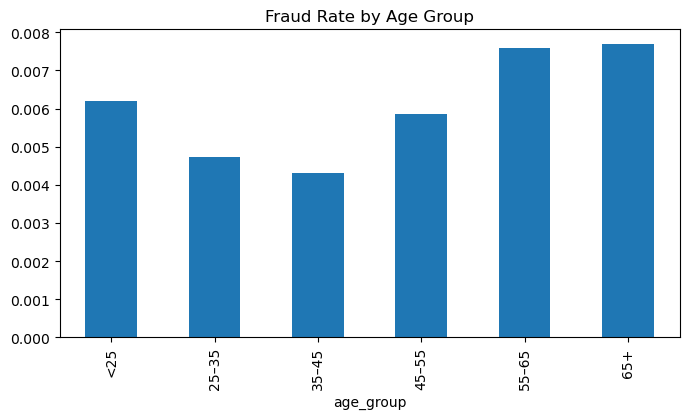

In [473]:
#Fraud Rate by Age group

train_data['age_group'] = pd.cut(
    train_data['age'],
    bins=[0,25,35,45,55,65,100],
    labels=['<25','25–35','35–45','45–55','55–65','65+']
)

fraud_by_age = (
    train_data
    .groupby('age_group')['is_fraud']
    .mean()
)

fraud_by_age.plot(
    kind='bar',
    figsize=(8,4),
    title='Fraud Rate by Age Group'
)

From the above Fraud Rate Vs Age group, we can interpret that:

1. A U-shaped relationship with age. Lower fraud rates in middle-aged customers (25–45). Higher fraud rates among: very young customers (<25) and older customers (55+)
2. Highest group (65+) ≈ 0.77% and Lowest group (35–45) ≈ 0.43%
3. Younger customers (<25) higher use of online platforms, less financial experience and more expiremental spending behavior. Older customers(55+) higher vulnerability to phishing, social engineering and account takeover.

   Fraud rates vary modestly across age groups. While age alone is not a strong predictor, it provides incremental signal when combined with behavioral features such as transaction amount, timing, and location. These findings support the inclusion of age as a contextual feature rather than a primary driver in fraud detection models.

<Axes: title={'center': 'Fraud Rate by Hour of Day'}, xlabel='hour'>

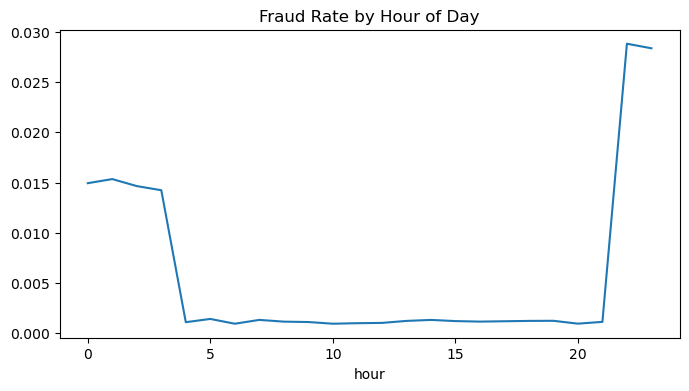

In [485]:
# Time-based Fraud patterns

fraud_by_hour = train_data.groupby('hour')['is_fraud'].mean()

fraud_by_hour.plot(
    figsize=(8,4),
    title='Fraud Rate by Hour of Day'
)

<Axes: title={'center': 'Fraud Rate by weekend'}, xlabel='is_weekend'>

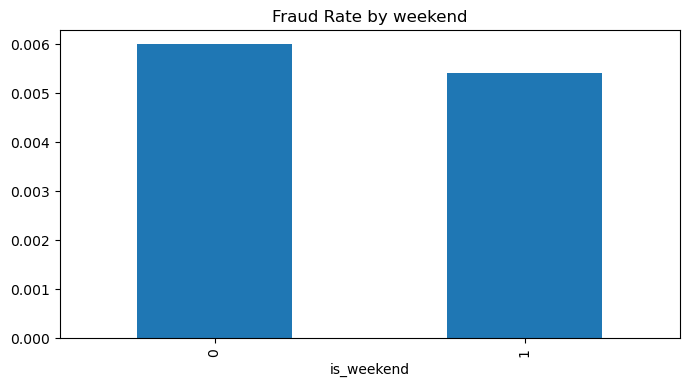

In [487]:
fraud_by_weekend=train_data.groupby('is_weekend')['is_fraud'].mean()
fraud_by_weekend.plot(
    kind='bar',
    figsize=(8,4),
    title='Fraud Rate by weekend'
)

From the Time-based Fraud patterns:

FRAUD RATES BY HOUR
Fraud is dramatically concentrated at night
    Late night (22–23) → ~2.8% fraud
    Early morning (00–03) → ~1.5% fraud
    Daytime (04–21) → ~0.1% fraud
~25× higher fraud risk at night vs daytime. Fraudulent transactions are far more likely to occur during late-night and early-morning hours. This pattern makes sense because at late night/early morning Cardholders are asleep, Alerts go unnoticed, Fraudsters act when detection is delayed, Online transactions dominate. In Daytime Customers are active, Legitimate transactions dominate, Fraud attempts are more quickly noticed and blocked. This is behavioral timing. 
04–06 → fraud rate drops sharply (~0.1%)- Fraudsters avoid very early morning hours.

FRAUD RATES BY WEEKEND
Difference Fraud rates on weekends(0.54%) vs weekdays(0.59%) is small. Weekend alone is weak predictor. 

Transactions occurring between 10 PM and 3 AM exhibit fraud rates several times higher than daytime transactions, suggesting that fraudsters exploit periods of reduced customer activity and delayed detection.


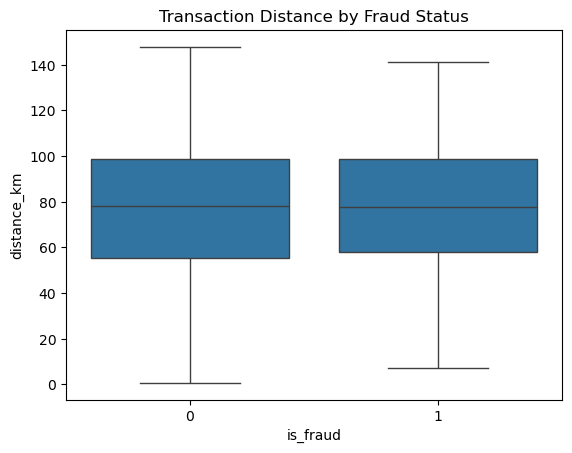

In [501]:
#Merchant distance Analysis

sns.boxplot(
    data=train_data.sample(50000, random_state=42),
    x='is_fraud',
    y='distance_km'
)
plt.title('Transaction Distance by Fraud Status')
plt.show()


Average merchant distance does not differ meaningfully between fraudulent and legitimate transactions. However, this similarity at the mean masks important tail behavior.

Let's run a percentile table instead of the median.

In [507]:

distance_summary = (
    train_data
    .groupby('is_fraud')['distance_km']
    .describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99])
)

distance_summary


,count,mean,std,min,50%,75%,90%,95%,99%,max
is_fraud,,,,,,,,,,
0,1289169.00000,76.11376,29.11905,0.02225,78.23301,98.50450,112.82154,120.49673,132.05286,152.11717
1,7506.00000,76.26833,28.75260,0.73877,77.93195,98.39109,112.74966,120.15581,132.03978,144.52241


Analysis of merchant distance shows nearly identical distributions for fraudulent and legitimate transactions across all percentiles. This indicates that distance alone is not a strong discriminator of fraud.

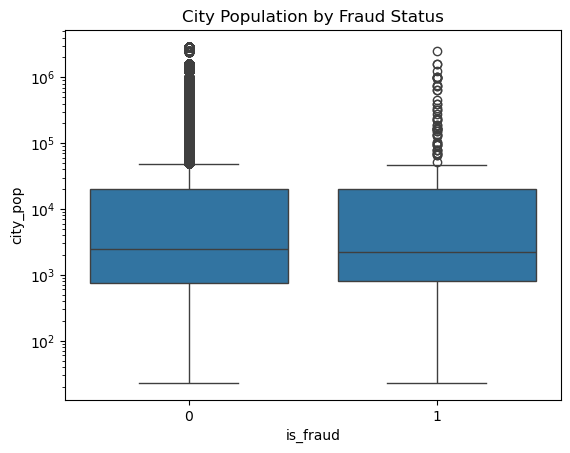

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
is_fraud,,,,,,,,,,,
0,1289169.00000,88775.22814,301806.54520,23.00000,743.00000,2456.00000,20328.00000,186140.00000,525713.00000,1577385.00000,2906700.00000
1,7506.00000,97276.76326,326581.46667,23.00000,746.50000,2623.00000,21437.00000,203571.00000,601723.00000,1595797.00000,2906700.00000


In [521]:
#Urban vs Rural Fraud (City Population)

sns.boxplot(
    data=train_data.sample(50000, random_state=42),
    x='is_fraud',
    y='city_pop'
)
plt.yscale('log')
plt.title('City Population by Fraud Status')
plt.show()

city_pop_box_table = (
    train_data
    .groupby('is_fraud')['city_pop']
    .describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
)

city_pop_box_table


In [519]:
city_bins = [
    0,
    1_000,
    5_000,
    20_000,
    100_000,
    500_000,
    1_000_000,
    np.inf
]

train_data['city_pop_bin'] = pd.cut(
    train_data['city_pop'],
    bins=city_bins
)

city_fraud_table = (
    train_data
    .groupby('city_pop_bin')
    .agg(
        fraud_rate=('is_fraud', 'mean'),
        fraud_count=('is_fraud', 'sum'),
        total_txn=('is_fraud', 'count')
    )
)

city_fraud_table


/var/folders/yz/2tvkvkzj1yjcrnwv64pv0kt00000gn/T/ipykernel_24217/568905112.py:19: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,fraud_rate,fraud_count,total_txn
city_pop_bin,,,
"(0.0, 1000.0]",0.00578,2299,398055
"(1000.0, 5000.0]",0.00569,2227,391164
"(5000.0, 20000.0]",0.00589,1069,181425
"(20000.0, 100000.0]",0.00499,735,147157
"(100000.0, 500000.0]",0.00678,767,113165
"(500000.0, 1000000.0]",0.00654,215,32895
"(1000000.0, inf]",0.00591,194,32814


Fraudulent transactions exhibit slightly higher city populations in the upper tail of the distribution, the overall separation is modest. These results indicate that city population alone is not a strong predictor of fraud.

Fraud rates show limited variation across city population sizes. While moderately higher fraud rates are observed in mid-sized urban areas (100k–500k population), the overall relationship between city population and fraud risk is weak and non-monotonic.Most fraudulent transactions occur in smaller population areas due to higher transaction volume. These findings indicate that city population provides contextual rather than decisive predictive signal and should be used in combination with behavioral features.

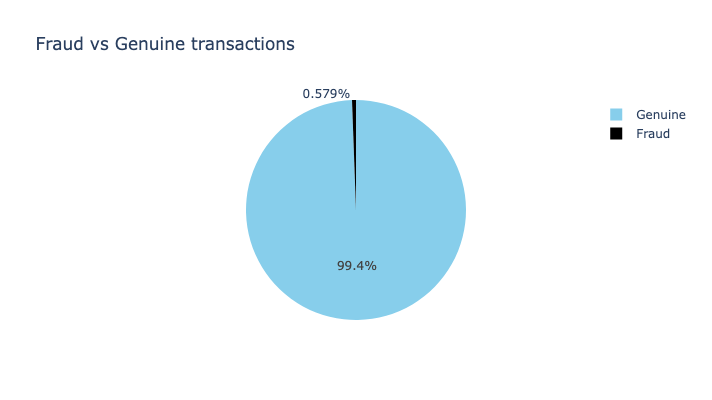

In [284]:
#Class Imbalance Confirmation

labels=["Genuine","Fraud"]

fraud_or_not = train_data["is_fraud"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=train_data['is_fraud'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
fig.show()

/var/folders/yz/2tvkvkzj1yjcrnwv64pv0kt00000gn/T/ipykernel_24217/2873383066.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




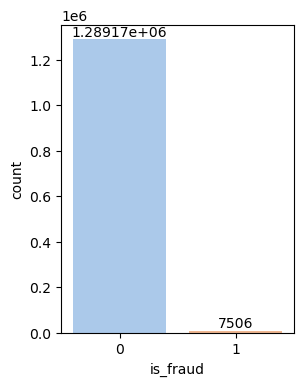

In [286]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='is_fraud',data=train_data,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

Fraud accounts for less than 1% of transactions, confirming the need for specialized
evaluation metrics and threshold tuning.

In [290]:
train_data.drop_duplicates(inplace=True)

In [523]:
train_data.head()

amt_bin	age_group	distance_bin	city_pop_bin

,trans_date_trans_time,category,amt,gender,state,lat,long,city_pop,dob,unix_time,...,is_fraud,age,hour,day_of_week,is_weekend,distance_km,amt_bin,age_group,distance_bin,city_pop_bin
0,2019-01-01 00:00:18,misc_net,4.97000,F,NC,36.07880,-81.17810,3495,1988-03-09,1325376018,...,0,30,0,1,0,78.59757,"[0.0, 10.0)",25–35,"(50.0, 100.0]","(1000.0, 5000.0]"
1,2019-01-01 00:00:44,grocery_pos,107.23000,F,WA,48.88780,-118.21050,149,1978-06-21,1325376044,...,0,40,0,1,0,30.21218,"[100.0, 250.0)",35–45,"(25.0, 50.0]","(0.0, 1000.0]"
2,2019-01-01 00:00:51,entertainment,220.11000,M,ID,42.18080,-112.26200,4154,1962-01-19,1325376051,...,0,56,0,1,0,108.20608,"[100.0, 250.0)",55–65,"(100.0, 200.0]","(1000.0, 5000.0]"
3,2019-01-01 00:01:16,gas_transport,45.00000,M,MT,46.23060,-112.11380,1939,1967-01-12,1325376076,...,0,52,0,1,0,95.67323,"[25.0, 50.0)",45–55,"(50.0, 100.0]","(1000.0, 5000.0]"
4,2019-01-01 00:03:06,misc_pos,41.96000,M,VA,38.42070,-79.46290,99,1986-03-28,1325376186,...,0,32,0,1,0,77.55674,"[25.0, 50.0)",25–35,"(50.0, 100.0]","(0.0, 1000.0]"


Checking for Outliers

In [541]:
df=train_data.copy()
df=df.drop(columns=['amt_bin',	'age_group',	'distance_bin',	'city_pop_bin'])

In [543]:
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['is_late_night']=df['hour'].isin([22,23,0,1,2,3]).astype(int)

In [545]:
#In fraud detection, extreme values often represent the very anomalies we want to detect, so instead of removing outliers,
#I preserved them and applied log transformations to reduce skew while retaining predictive signal.

df['log_amt'] = np.log1p(df['amt'])
df['log_distance_km'] = np.log1p(df['distance_km'])
df['log_city_pop'] = np.log1p(df['city_pop'])

Since it's an imbalanced dataset, ACCURACY could not be thr right metric. We need to focus on
1. Recall → primary metric
2. Precision → secondary
3. PR-AUC → very important
4. Confusion matrix → mandatory

In [547]:
df = df.drop(columns=['hour'])

In [555]:
#Encoding the 'category' column of train dataset

cat_encoder = OneHotEncoder(
    drop='first',          # avoids multicollinearity
    sparse_output=False,
    handle_unknown='ignore'
)
cat_encoder.fit(df[['category']])

df_train_cat=cat_encoder.transform(df[['category']])

cat_cols = cat_encoder.get_feature_names_out(['category'])

df_train_cat = pd.DataFrame(
    df_train_cat,
    columns=cat_cols,
    index=df.index
)

In [557]:
features = [
    'age',
    'hour_sin',
    'hour_cos',
    'is_weekend',
    'is_late_night',
    'log_amt',
    'log_distance_km',
    'log_city_pop'
]

X_train = pd.concat(
    [df[features], df_train_cat],
    axis=1
)
y_train = df['is_fraud']


In [559]:
X_train.head()

,age,hour_sin,hour_cos,is_weekend,is_late_night,log_amt,log_distance_km,log_city_pop,category_food_dining,category_gas_transport,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,30,0.00000,1.00000,0,1,1.78675,4.37698,8.15937,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,40,0.00000,1.00000,0,1,4.68426,3.44081,5.01064,0.00000,0.00000,...,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,56,0.00000,1.00000,0,1,5.39866,4.69324,8.33207,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,52,0.00000,1.00000,0,1,3.82864,4.57134,7.57044,0.00000,1.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,32,0.00000,1.00000,0,1,3.76027,4.36382,4.60517,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000


In [561]:
test_data = pd.read_csv("/Users/poojitha/Downloads/archive (6)/fraudTest.csv")

In [563]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86000,Jeff,Elliott,M,351 Darlene Green,...,33.96590,-80.93550,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.98639,-81.20071,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84000,Joanne,Williams,F,3638 Marsh Union,...,40.32070,-110.43600,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.45050,-109.96043,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28000,Ashley,Lopez,F,9333 Valentine Point,...,40.67290,-73.53650,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.49581,-74.19611,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05000,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.56970,-80.81910,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.81240,-80.88306,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19000,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.25290,-85.01700,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.95915,-85.88473,0


In [587]:
df1=test_data.copy()

In [589]:
df1['trans_date_trans_time'] = pd.to_datetime(df1['trans_date_trans_time'])
df1['dob'] = pd.to_datetime(df1['dob'])
df1['hour'] = df1['trans_date_trans_time'].dt.hour
df1['day_of_week'] = df1['trans_date_trans_time'].dt.dayofweek
df1['is_weekend'] = df1['day_of_week'].isin([5, 6]).astype(int)
df1['age'] = (df1['trans_date_trans_time'] - df1['dob']).dt.days // 365
df1['distance_km'] = haversine_distance(
df1['lat'], df1['long'], df1['merch_lat'], df1['merch_long'])

In [591]:
df1.drop(columns=['Unnamed: 0','cc_num','first','last','street','city','zip','trans_num','merchant','job'],inplace=True)

In [593]:
df1.dropna(ignore_index=True)

,trans_date_trans_time,category,amt,gender,state,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,hour,day_of_week,is_weekend,age,distance_km
0,2020-06-21 12:14:25,personal_care,2.86000,M,SC,33.96590,-80.93550,333497,1968-03-19,1371816865,33.98639,-81.20071,0,12,6,1,52,24.56146
1,2020-06-21 12:14:33,personal_care,29.84000,F,UT,40.32070,-110.43600,302,1990-01-17,1371816873,39.45050,-109.96043,0,12,6,1,30,104.92509
2,2020-06-21 12:14:53,health_fitness,41.28000,F,NY,40.67290,-73.53650,34496,1970-10-21,1371816893,40.49581,-74.19611,0,12,6,1,49,59.08008
3,2020-06-21 12:15:15,misc_pos,60.05000,M,FL,28.56970,-80.81910,54767,1987-07-25,1371816915,28.81240,-80.88306,0,12,6,1,32,27.69857
4,2020-06-21 12:15:17,travel,3.19000,M,MI,44.25290,-85.01700,1126,1955-07-06,1371816917,44.95915,-85.88473,0,12,6,1,65,104.33511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,health_fitness,43.77000,M,MO,40.49310,-91.89120,519,1966-02-13,1388534347,39.94684,-91.33333,0,23,3,0,54,77.02615
555715,2020-12-31 23:59:09,kids_pets,111.84000,M,TX,29.03930,-95.44010,28739,1999-12-27,1388534349,29.66105,-96.18663,0,23,3,0,21,100.07442
555716,2020-12-31 23:59:15,kids_pets,86.88000,F,WA,46.19660,-118.90170,3684,1981-11-29,1388534355,46.65834,-119.71505,0,23,3,0,39,80.75930
555717,2020-12-31 23:59:24,travel,7.99000,M,ID,44.62550,-116.44930,129,1965-12-15,1388534364,44.47053,-117.08089,0,23,3,0,55,52.93324


In [595]:
df1['hour_sin'] = np.sin(2 * np.pi * df1['hour'] / 24)
df1['hour_cos'] = np.cos(2 * np.pi * df1['hour'] / 24)
df1['is_late_night']=df1['hour'].isin([22, 23, 0, 1, 2, 3]).astype(int)

In [597]:
df1 = df1.drop(columns=['hour'])

In [599]:
df1.head()

,trans_date_trans_time,category,amt,gender,state,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,day_of_week,is_weekend,age,distance_km,hour_sin,hour_cos,is_late_night
0,2020-06-21 12:14:25,personal_care,2.86000,M,SC,33.96590,-80.93550,333497,1968-03-19,1371816865,33.98639,-81.20071,0,6,1,52,24.56146,0.00000,-1.00000,0
1,2020-06-21 12:14:33,personal_care,29.84000,F,UT,40.32070,-110.43600,302,1990-01-17,1371816873,39.45050,-109.96043,0,6,1,30,104.92509,0.00000,-1.00000,0
2,2020-06-21 12:14:53,health_fitness,41.28000,F,NY,40.67290,-73.53650,34496,1970-10-21,1371816893,40.49581,-74.19611,0,6,1,49,59.08008,0.00000,-1.00000,0
3,2020-06-21 12:15:15,misc_pos,60.05000,M,FL,28.56970,-80.81910,54767,1987-07-25,1371816915,28.81240,-80.88306,0,6,1,32,27.69857,0.00000,-1.00000,0
4,2020-06-21 12:15:17,travel,3.19000,M,MI,44.25290,-85.01700,1126,1955-07-06,1371816917,44.95915,-85.88473,0,6,1,65,104.33511,0.00000,-1.00000,0


In [601]:
df1['log_amt'] = np.log1p(df1['amt'])
df1['log_distance_km'] = np.log1p(df1['distance_km'])
df1['log_city_pop'] = np.log1p(df1['city_pop'])

In [603]:
df1 = df1.drop(columns=['trans_date_trans_time','amt','gender','state',
                        'lat','long','city_pop','dob','unix_time','distance_km',
                       ])

In [605]:
df1 = df1.drop(columns=['merch_lat','merch_long'])

In [607]:
#Encoding the 'category' column of test dataset

cat_encoder.fit(df1[['category']])

df1_test_cat=cat_encoder.transform(df1[['category']])

cat_cols = cat_encoder.get_feature_names_out(['category'])

df1_test_cat = pd.DataFrame(
    df1_test_cat,
    columns=cat_cols,
    index=df1.index
)

In [609]:
features = [
    'age',
    'hour_sin',
    'hour_cos',
    'is_weekend',
    'is_late_night',
    'log_amt',
    'log_distance_km',
    'log_city_pop'
]

X_test = pd.concat(
    [df1[features], df1_test_cat],
    axis=1
)
y_test = df1['is_fraud']

In [611]:
X_test.shape

(555719, 21)

In [613]:
y_test.shape

(555719,)

MODELING OBJECTIVE

The objective is to identify fraudulent transactions with high recall.
False positives are acceptable, while false negatives are costly and should be minimized.
Model evaluation will therefore focus on recall, precision–recall trade-offs, and confusion matrices,
rather than accuracy.

In [617]:
X_train_full=X_train
y_train_full=y_train

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full,
    y_train_full,
    test_size=0.20,        # 20% validation is a good default
    stratify=y_train_full, # preserves class imbalance ratio
    random_state=42
)

print("Train size:", X_train.shape, "Fraud rate:", y_train.mean())
print("Val size:  ", X_val.shape,   "Fraud rate:", y_val.mean())

Train size: (1037340, 21) Fraud rate: 0.00578884454470087
Val size:   (259335, 21) Fraud rate: 0.005787880540613492


LOGISTIC REGRESSION

In [620]:

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

In [622]:
model = LogisticRegression(
    class_weight='balanced',  # handles imbalance
    max_iter=1000,
    random_state=42
)

model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [624]:
y_val_proba = model.predict_proba(X_val_scaled)[:, 1]

In [626]:
y_val_pred_05 = (y_val_proba >= 0.5).astype(int)

print("Confusion Matrix (threshold = 0.5)")
print(confusion_matrix(y_val, y_val_pred_05))

print(classification_report(y_val, y_val_pred_05))


Confusion Matrix (threshold = 0.5)
[[217416  40418]
 [   231   1270]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91    257834
           1       0.03      0.85      0.06      1501

    accuracy                           0.84    259335
   macro avg       0.51      0.84      0.49    259335
weighted avg       0.99      0.84      0.91    259335



Reading the confusion Matrix:

Legit correctly identified as legit (True Negatives)- 217416
Legit incorrectly identified as fraud (False Positives)- 40418
Fraud incorrectly identified as legit (False Negatives)- 231
Fraud correctly identified as fraud (True Positives) - 1270

There are 1,501 actual frauds in this validation set.
Caught frauds (TP): 1,270
Missed frauds (FN): 231
Fraud Recall= 1270/(1270+231)= 85%

macro F1=0.49 - treats legit and fraud equally. the weighted avg f1=0.91 is dominated by legit class. For Fraud problems macro metrics are more honest than weighted ones.

Fraud Precision is 3% which looks bad because in our dataset there is only 0.58% of transacations which are fraud. Many flagged transactions are legitimate. Total transactions flagged as fraud is (40418+1270)=41688 and only 1270 are TRULY fraud. 

Many customers maybe inconvenienced but most fraud (85%) is being caught. Also, the executives have explicitly said that this is acceptable. 

Accuracy is 84% which is not impressive but also not important.

So at threshold=0.5, this model chooses to flag 40.5k legit transactions, catches 1270 frauds and misses 231 frauds. Missing 231 frauds can be costly for the business, so we want to catch more fraud, even if there are more false positives. 

let's lower the probability threshold to 0.25


In [628]:
y_val_pred_025 = (y_val_proba >= 0.25).astype(int)

print("Confusion Matrix (threshold = 0.25)")
print(confusion_matrix(y_val, y_val_pred_025))

print(classification_report(y_val, y_val_pred_025))

Confusion Matrix (threshold = 0.25)
[[190623  67211]
 [    55   1446]]
              precision    recall  f1-score   support

           0       1.00      0.74      0.85    257834
           1       0.02      0.96      0.04      1501

    accuracy                           0.74    259335
   macro avg       0.51      0.85      0.45    259335
weighted avg       0.99      0.74      0.85    259335



Lets compare both the threshold values:
@ 0.5 → 85% (231 missed frauds)
@ 0.25 → 96% (55 missed frauds)

There is a significant improvement in recall from 0.85 to 0.96. Missed fraud dropped from 231 → 55. False positives roughly increased +26,793 extra flagged transactions.
If we decrease the threshold to much lower value , say 0.2 even though recall increases by a little bit, the no of false positives would be way too high.  

Even if the business accepts false positives, we cannot have too many false positives - which can affect customer experience +churn. Customers get blocked at checkout. They abandon the card. Brand promise (“safest card”) looks like “most annoying card”. Triggers massive customer friction.
Also in the dataset we just have 0.58% fraud transactions, if you flag too aggressively, fraud queue becaomes almost entirely legit transactions and reduces trust in system. 

After a point, each small gain in recall costs a huge number of false positives. 

So we can choose, threshold=0.25, since it provides excellent recall, fewer false positives. Although lowering the probability threshold further continued to increase fraud recall, the marginal gains diminished rapidly. 


EVALUATING ON THE TEST dataset

In [634]:

# Predict probabilities on test data
y_test_proba = model.predict_proba(X_test_scaled)[:, 1]

# Apply chosen threshold
threshold = 0.25
y_test_pred = (y_test_proba >= threshold).astype(int)

# Evaluate
print("Confusion Matrix (Test Set, threshold = 0.25)")
print(confusion_matrix(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))


Confusion Matrix (Test Set, threshold = 0.25)
[[408689 144885]
 [   112   2033]]
              precision    recall  f1-score   support

           0       1.00      0.74      0.85    553574
           1       0.01      0.95      0.03      2145

    accuracy                           0.74    555719
   macro avg       0.51      0.84      0.44    555719
weighted avg       1.00      0.74      0.85    555719



Total Fraud Cases in Test set = 2145
Fraud **Recall= 95%** on completely unseen data. And we have about 1% of flagged transactions that are actually fraud. **Missed Fraud is 112 out of 2145**

While the model produces a high number of **false positives (144,885)**, this behavior aligns with the business objective of minimizing missed fraud cases and confirms the stability of the selected decision threshold

In [ ]:
Now we have completed the Logistic regression baseline. 
    
Tree-based models add value because:
Capture non-linear interactions
Handle feature interactions automatically
Are robust to outliers
Often improve recall in fraud detection

We’ll compare:
Logistic Regression (baseline)
Random Forest
Gradient Boosting (sklearn)

RANDOM FOREST

In [636]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)  # NOTE: RF does NOT need scaled features


RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=200,
                       n_jobs=-1, random_state=42)

Let's evaluate Random Forest using the rf_model

In [638]:
y_val_proba = rf_model.predict_proba(X_val)[:, 1]
y_val_pred = (y_val_proba >= 0.25).astype(int)

# Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_val, y_val_pred).ravel()

# Metrics
recall = tp / (tp + fn)
precision, recall_curve, _ = precision_recall_curve(y_val, y_val_proba)
pr_auc = auc(recall_curve, precision)

print("VAL recall_fraud", recall)
print("VAL false_positives", fp)
print( "VAL missed_fraud", fn)
print("VAL pr_auc", pr_auc)

VAL recall_fraud 0.9753497668221186
VAL false_positives 15563
VAL missed_fraud 37
VAL pr_auc 0.848643716491714


In [644]:
y_test_proba = rf_model.predict_proba(X_test)[:, 1]
y_test_pred  = (y_test_proba >= 0.25).astype(int)

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

recall_fraud = tp / (tp + fn)
precision, recall_curve, _ = precision_recall_curve(y_test, y_test_proba)
pr_auc = auc(recall_curve, precision)

print("TEST recall_fraud:", recall_fraud)
print("TEST false_positives:", fp)
print("TEST missed_fraud:", fn)
print("TEST pr_auc:", pr_auc)


TEST recall_fraud: 0.965034965034965
TEST false_positives: 34196
TEST missed_fraud: 75
TEST pr_auc: 0.7945722369229221


**96.5% of fraud** is caught
Only **75 frauds** missed out of 2,145
False positives are dramatically lower than Logistic Regression
PR-AUC shows strong ranking ability on unseen data

Let’s put the two models head-to-head at the same threshold (0.25):
🔹 Logistic Regression (Test)
Recall ≈ 95%
Missed fraud = 112
False positives = 145k
PR_AUC = very low

🔹 Random Forest (Test)
Recall (fraud)       = 0.965
Missed fraud (FN)    = 75
**False positives (FP) = 34k**
PR-AUC               = 0.795

By switching from Logistic Regression → Random Forest:
Random Forest achieves higher recall with ~4× fewer false alarms. its massive from an operational standpoint. RF learns from non-linear patterns; Captures feature interactions (amount × time × category); Separates fraud more cleanly in probability space. The high PR-AUC indicates strong ranking performance, enabling effective prioritization of transactions for review.

Gradient Boosting

In [646]:
# Create sample weights (heavier weight on fraud)
pos_weight = (len(y_train) - y_train.sum()) / y_train.sum()
sample_weight = np.where(y_train == 1, pos_weight, 1.0)

gb_model = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train, y_train, sample_weight=sample_weight)


GradientBoostingClassifier(learning_rate=0.05, n_estimators=300,
                           random_state=42)

In [648]:
threshold = 0.25

y_val_proba = gb_model.predict_proba(X_val)[:, 1]
y_val_pred  = (y_val_proba >= threshold).astype(int)

# Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_val, y_val_pred).ravel()

# Metrics
recall = tp / (tp + fn)
precision, recall_curve, _ = precision_recall_curve(y_val, y_val_proba)
pr_auc = auc(recall_curve, precision)

print("VAL recall_fraud", recall)
print("VAL false_positives", fp)
print("VAL missed_fraud", fn)
print("VAL pr_auc", pr_auc)


VAL recall_fraud 0.9920053297801465
VAL false_positives 15598
VAL missed_fraud 12
VAL pr_auc 0.7244089627155609


In [652]:
y_test_proba = gb_model.predict_proba(X_test)[:, 1]
y_test_pred  = (y_test_proba >= threshold).astype(int)

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

recall_fraud = tp / (tp + fn)
precision, recall_curve, _ = precision_recall_curve(y_test, y_test_proba)
pr_auc = auc(recall_curve, precision)

print("TEST recall_fraud:", recall_fraud)
print("TEST false_positives:", fp)
print("TEST missed_fraud:", fn)
print("TEST pr_auc:", pr_auc)


TEST recall_fraud: 0.9822843822843823
TEST false_positives: 33572
TEST missed_fraud: 38
TEST pr_auc: 0.6570572494780095


We catch **98.2% of all fraud** ,  **38 fraud cases** (lowest so far)
False positives **(33.5k)** are slightly lower or almost same as RF.

Ranking quality (PR-AUC) drops compared to RF, but still solid.

Comnparing the 2 best models so far:
| Model                 | Fraud Recall | Missed Fraud | False Positives | PR-AUC    |
| --------------------- | ------------ | ------------ | --------------- | --------- |     |
| Random Forest         | 0.965        | 75           | 34,196          | 0.795     |
| Gradient Boosting     | 0.982        | 38           | 33,572          | 0.657     |


In [ ]:
Interpret the trade-offs (this is the key):

Logistic Regression
❌ Too many false positives
❌ Weak ranking
✅ Good baseline, interpretable

Random Forest
✔️ Very strong recall
✔️ Best PR-AUC (excellent ranking)
✔️ Slightly more missed fraud
❌ Slightly worse fraud capture than GB

Gradient Boosting
✔️ Best fraud capture
✔️ Fewest missed frauds
✔️ Slightly fewer false positives than RF
❌ Lower PR-AUC (ranking less clean than RF)

Choosing the right model
Business objective: #1 priority is fraud prevention
So, Gradient Boosting wins. Minimizes missed fraud better than any other model. 
False positives are comparable to RF. 
PR-AUC being lower does NOT disqualify GB- Business cares about missed fraud, not ranking elegance.

Final Model Choice: Gradient Boosting
Highest fraud recall (98.2%)
Lowest number of missed fraud cases
False positives remain far lower than Logistic Regression
Best alignment with business objective

Three models were evaluated: Logistic Regression, Random Forest, and Gradient Boosting.

Using a fixed probability threshold of 0.25. While Logistic Regression provided a 
strong baseline, it resulted in an unacceptably high number of false positives.
Random Forest substantially reduced false positives while maintaining high recall. 
Gradient Boosting achieved the highest fraud recall (98.2%) and the lowest number of 
missed fraudulent transactions, while producing a comparable number of false positives to Random Forest. Given the business requirement to err on the side of caution, Gradient 
Boosting was selected as the final recommended model.